In [0]:
"""

Use your Monte Carlo skills from last week – create an event that occurs at 0,0,0 in our coordinate system and moves in the positive z direction (only).
Its angle can be at any angle with respect to the x and y axis (choose randomly) and it will then pass through our detector.
Build 8 Z detection points and divide up the x/y space into pixels of the detector – choose some appropriately size detection points.
Each time it passes through the a detector layer, (for z=1,2…8), calculate where it should be based on the angle. Then round that the find which pixel of the detector it is in, and then, add a small probability (10% maybe) that it is found in an adjacent pixel (there are 8 adjacent pixels) – pick one randomly. Record that as the coordinate and then move to the next detector layer.
When the particle leaves the last layer of the detector we can ignore it.

"""

%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import scipy.stats

#specify parameters
#mm: for how many particles at the time you are doing simulation
aa=-1000 #lower edge of detector
bb=1000 #upper edge of detector
cc=0.1 #width of the detection cell
#null_activate: if you want to exclude every 1% of the measurements from chi2 calculation, choose False, else True

def chi_square(mm, null_activate, statistics):
  chi=[] #define list for chi-square

  print("Simulation run for: ", mm, " particle(s).")

  #define detection cells of the detector
  detectorX=np.arange(aa,bb,cc) #list for x axis of detector
  detectorY=np.arange(aa,bb,cc) #list for y axis of detector

  for k in range(mm): #for every particle we track (one at the time):
    # Data for a three-dimensional line (3D location of a particle)
    zline = np.linspace(0, 10, 80) #create z axis
    xline=zline*np.tan(random.randint(0,90)) #for every z, there exist such x, y based on a random initial angle
    yline=zline*np.tan(random.randint(0,90))

    #get 3D location of a particle for only 8 detection points
    number=int(len(zline)/8.5) #to get 8 detection points, excludig 0 start (which we will later substract)
    XdetPoints=xline[::number]
    YdetPoints=yline[::number]
    ZdetPoints=zline[::number]

    #make arrays into lists so you can use list tools (like .pop()/.remove()...)
    ZdetPoints=list(ZdetPoints)
    YdetPoints=list(YdetPoints)
    XdetPoints=list(XdetPoints)

    XdetPoints.remove(XdetPoints[0])
    YdetPoints.pop(0)
    ZdetPoints.pop(0)

    if mm==1:
      print("")
      print("Actual points where the particle ended:")
      print("z points",ZdetPoints)
      print("y points:",YdetPoints)
      print("x points:",XdetPoints)
    if mm!=1:
      pass

    #detected points lists (error of non-infinetelisimal detection cells)
    x_cell_size_error_incl=[]
    y_cell_size_error_incl=[]


    """which cells detect the particle:"""
    m=0
    for m in range(len(XdetPoints)): #for every element in x values for detected particles
      j=0
      for j in range(len(detectorX)): #for every possible detection cell
        if j<(len(detectorX)-1): #except for the last detection cell (out of range error)
          if detectorX[j]<=XdetPoints[m]<detectorX[j+1]: #if the value of the detected points is between the value of jth and j+1th element of detection cell
            x_cell_size_error_incl.append((detectorX[j]+detectorX[j+1])/2) #set this detector cell as the cell that detected the particle
    else:
      pass

    m=0
    for m in range(len(YdetPoints)): #for every element in y values for detected particles
      j=0
      for j in range(len(detectorY)): #for every point in the detection cells
        if j<(len(detectorY)-1): #except for the last detection cell
          if detectorY[j]<=YdetPoints[m]<detectorY[j+1]: #if the value of the detected points is between the value of jth and j+1th element of detection cells
            y_cell_size_error_incl.append((detectorY[j]+detectorY[j+1])/2)
    else:
      pass

    if mm==1:
      print("")
      print("Detector cells that would ideally detect the particles, given the non-infinetelisimal nature of detector cells:")
      print("x cells: ", x_cell_size_error_incl)
      print("y cells: ", y_cell_size_error_incl)
    if mm!=1:
      pass

    """
    add a small probability (10% maybe) that it is found in an
    adjacent pixel (there are 8 adjacent pixels) – pick one randomly. Record that as the
    coordinate and then move to the next detector layer.
    """

    #only consider cases where a particle lands on every detector (if it happens for instance to have the initial angle of 89 degrees or so wrt z axis, then it will not hit the detector)
    if len(y_cell_size_error_incl)==len(x_cell_size_error_incl)==8: 

      #each elemenet of detected x,y values gets a random number 0-1
      probX=[]
      for m in x_cell_size_error_incl:
        probX.append(random.random())
      #print(probX) 
      probY=[]
      for m in y_cell_size_error_incl:
        probY.append(random.random())
      #print(probY) 

      #lists of final detected locations of each particle (incl prob that it is found in an adjacent pixel)
      x_measured=[]
      y_measured=[]

      #probability that it is detected in the detected pixel, prob that it is detected in any 8 of the adjacent pixels...
      i=0
      for i in range(len(probX)):
        if 0<=probX[i]<0.0375:
          x_measured.append(x_cell_size_error_incl[i]-cc)
        if 0.0375<=probX[i]<0.075:
          x_measured.append(x_cell_size_error_incl[i]+cc)
        if 0.075<=probX[i]:
          x_measured.append(x_cell_size_error_incl[i])

      i=0
      for i in range(len(probY)):
        if 0<=probY[i]<0.0375:
          y_measured.append(y_cell_size_error_incl[i]-0.25)
        if 0.0375<=probY[i]<0.075:
          y_measured.append(y_cell_size_error_incl[i]+0.25)
        if 0.075<=probY[i]:
          y_measured.append(y_cell_size_error_incl[i])
      

      

      if mm==1:
        plt.plot(y_measured, x_measured, "red", label="detection")#make graph of actual particle
        print("")
        print("measured x (probs incl): ", x_measured)
        print("measured y (probs incl): ", y_measured)
      if mm!=1:
        pass

      """
      Use the information from the slides linked to calculate the 𝜒
      2 value for your track fit
      compared to your data. We expect this to not be perfect – we added some
      imperfection in there. If the imperfection is not good enough, you can increase the
      probabilities discussed.
      """
      sigma=[cc**2]*len(y_measured)
      #print("sigma list: ", sigma)


      Alist=[]
      Blist=[]
      Clist=[]
      Dlist=[]
      Elist=[]
      Flist=[]

      for i in range(len(sigma)):
        Alist.append(y_measured[i]/sigma[i])
        Blist.append(1/sigma[i])
        Clist.append(x_measured[i]/sigma[i])
        Dlist.append((y_measured[i]**2)/sigma[i])
        Elist.append((x_measured[i]*y_measured[i])/sigma[i])
        Flist.append((x_measured[i]**2)/sigma[i])
      A=sum(Alist)
      B=sum(Blist)
      C=sum(Clist)
      D=sum(Dlist)
      E=sum(Elist)
      F=sum(Flist)
      #print(A, B, C, D, E, F)

      a=(E*B-C*A)/(D*B-A*A)
      b=(D*C-E*A)/(B*D-A*A)

      if mm==1:
        print("")
        print("Prediction: x=", round(a,4),"*y + ", round(b,4))
        print("")
      if mm!=1:
        pass

      #predicted x values based on the formula deduced from datapoints
      linear_fit=[]

      for i in range(len(y_measured)):
        #print(y_measured[i])
        linear_fit.append(a*y_measured[i]+b)
      #print(linear_fit)

      #finally find chi
      ChiList=[]
      for i in range(len(sigma)):
        h=(x_measured[i]-a*y_measured[i]-b)**2/sigma[i]
        ChiList.append(h)
      chi.append(sum(ChiList)) 

  chi = [x for x in chi if str(x) != 'nan'] #remove infinities
  #for i in range(len(chi)):
  #  if chi[i]=="nan":
  #    chi.remove(chi[i])


  #plotting graphs
  if mm==1:
    plt.plot(y_measured, linear_fit, "blue", label="prediction") #make graph
    plt.legend(loc="lower right")
    plt.title("Detection vs Prediction")
  if mm!=1:
    plt.hist(chi)
    plt.title("full histogram")


  #leave out 1 percent
  if null_activate==True:
    probsnull=[]
    for i in range(len(ChiList)):
      probsnull.append(random.random())
    for i in range(len(probsnull)):
      if probsnull[i]<0.01:
        chi.remove(chi[i])

  if len(y_cell_size_error_incl)!=len(x_cell_size_error_incl)!=8:
    pass

  print("final chi2:", chi)

  if statistics==True:
    print("")
    print("mean: {}" .format(np.mean(chi)))
    print("variance: {}" .format(np.var(chi)))
    print("skewness: {}" .format(skew(chi)))
    print("kurtosis: {}" .format(kurtosis(chi)))

Simulation run for:  1  particle(s).

Actual points where the particle ended:
z points [1.139240506329114, 2.278481012658228, 3.417721518987342, 4.556962025316456, 5.69620253164557, 6.835443037974684, 7.974683544303798, 9.113924050632912]
y points: [-0.9578406707120047, -1.9156813414240095, -2.8735220121360143, -3.831362682848019, -4.789203353560024, -5.747044024272029, -6.704884694984034, -7.662725365696038]
x points: [1.845313508214526, 3.690627016429052, 5.535940524643578, 7.381254032858104, 9.22656754107263, 11.071881049287157, 12.917194557501682, 14.762508065716208]

Detector cells that would ideally detect the particles, given the non-infinetelisimal nature of detector cells:
x cells:  [1.8500000002277943, 3.6500000002282036, 5.550000000228636, 7.350000000229045, 9.250000000229477, 11.050000000229886, 12.950000000230318, 14.750000000230727]
y cells:  [-0.9499999997728423, -1.9499999997730697, -2.8499999997732743, -3.8499999997735017, -4.749999999773706, -5.749999999773934, -6.749

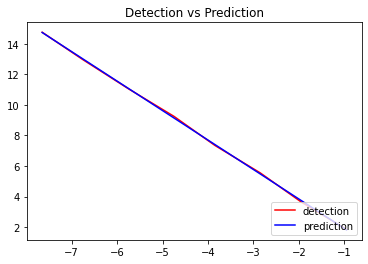

In [49]:
chi_square(1, False, False)

Simulation run for:  500  particle(s).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:184: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:185: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:199: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:184: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:185: RuntimeWarning: invalid value encountered in double_scalars


final chi2: [6.343728343728459, 0.4395128750642461, 0.020687871735203606, 85.87011587177068, 1.70549758598611, 1.098598943659155, 22.391906799042076, 1.9767336968621945, 0.9418061796974938, 0.9047619047619078, 0.5822573740669333, 41061.63113369037, 0.06834983958714314, 127.92848335388695, 1.0188766381807386, 17.93107476636329, 1.3844539105682543, 2.816708600039757, 579.0304667791241, 1.1547619047621116, 0.4638252509204124, 12.390096794596767, 3.475817722110598, 10144.851532571678, 0.46274509803942604, 0.5357142857145043, 114.19995272985527, 23.539453392295894, 577.5823377995243, 3.851859888774471e-32, 0.6173361522201546, 1.0324508588635775, 6.928444104917839, 8.653403752068321, 2.887051064185867, 53.73822444109176, 0.5357142857145317, 0.40381024715987074, 6.4155786656188605, 0.585028942290826, 0.5776212362380183, 0.1931349911726564, 1.1748408174483242, 555.520075578671, 0.12461139066061387, 1.6142857646649629, 3.7921473518633184, 0.5357142857137248, 0.77837156447211, 2.055909216718343,

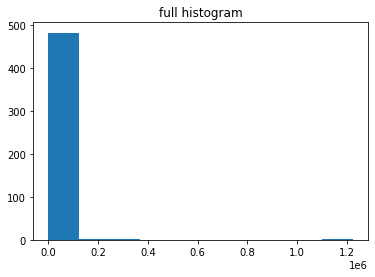

In [65]:
chi_square(500, False, True)

Simulation run for:  500  particle(s).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:184: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:185: RuntimeWarning: divide by zero encountered in double_scalars


final chi2: [1.5423361918244944, 1.154639175258254, 109.6485326325513, 1.726190476190853, 0.7277298248554649, 0.8349218597229314, 0.3768704604397119, 2.7641891107023286, 33.26057880181037, 5.626646479942007, 2.3933387523293685, 287.7377227547801, 14.992199687994368, 30708555.428585403, 0.6115217241143897, 1.2543738489876823, 4.024439918535039, 2.1477105768439535, 0.5346506372292, 11.347983067728123, 14213.4181001329, 0.7250000000001231, 1.6160394025378844, 1.3021829334296877, 0.583333333333597, 0.6271187639058393, 0.42308090852475355, 1.1739392151243595, 12.056919937250372, 0.8495443099639595, 0.05827514703082836, 279.38775510216755, 83.38607398282339, 15.462745098045321, 3016.936671577056, 908.2976558135023, 2.885245901640645, 1.4999999999999996, 1.3838664768727995, 0.6428571428574466, 6422.490328387989, 482421.2586257792, 0.046192228424590386, 7.1075393117407675, 18776.648927040027, 5.7395248001029255, 1.1167975385404332, 312.7596067919057, 0.6535849715204393, 8.027843819702513, 439.

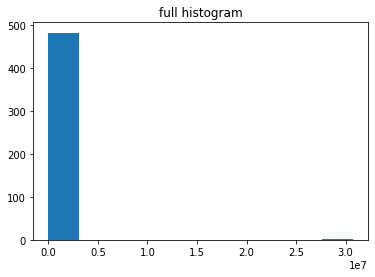

In [66]:
chi_square(500, True, True)